# Decision Tree Classifier on the Balance dataset

This data set was generated to model psychological experimental results. Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight). If they are equal, it is balanced.

More info on the dataset [here](https://archive.ics.uci.edu/ml/datasets/balance+scale) and [here](https://www.kaggle.com/mysticvalley/balance-scale-analysis-and-prediction).

Theory on Decision Trees: [here](https://towardsdatascience.com/decision-tree-fundamentals-388f57a60d2a) and [here](https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8).

0. Import the usual libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1. Import data

In [2]:
data = pd.read_csv('bl.txt', sep=",")
data.head()

,balance,left_weight,left_distance,right_weight,right_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


2. Show a statistics summary of the variables

In [3]:
data.describe()

,left_weight,left_distance,right_weight,right_distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


3. Show the shape of the dataset

In [4]:
data.shape

(625, 5)

4. Separate the dataset in two arrays ```X``` and ```y```, ```X``` being the predictor variables / features & ```y``` the target

In [5]:
y = data.balance
X = data.drop(columns = ["balance"])

In [6]:
X.head()

,left_weight,left_distance,right_weight,right_distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [7]:
y.head()

0    B
1    R
2    R
3    R
4    R
Name: balance, dtype: object

In [8]:
y.value_counts()

L    288
R    288
B     49
Name: balance, dtype: int64

The dataset values are skewed towards the R and L values. Hence, our model could overfit over these two classes and not predict the B values appropriately. 

5. Split the dataset (70/30) with random_state=42

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state = 42)

In [10]:
y_train.value_counts(), y_test.value_counts()

(R    202
 L    201
 B     34
 Name: balance, dtype: int64,
 L    87
 R    86
 B    15
 Name: balance, dtype: int64)

6. Instance a 'DecisionTreeClassifier' with GINI decision criterion

In [11]:
from sklearn import tree

clf_gini = tree.DecisionTreeClassifier()

In [12]:
clf_gini

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

7. Plot the decision tree

In [13]:
clf_gini = clf_gini.fit(X_train, y_train)

In [14]:
#tree.export_graphviz(clf_gini, out_file='tree.dot')
#tree.plot_tree(clf_gini)

In [15]:
print(clf_gini.max_depth)
print(clf_gini.min_samples_split)
print(clf_gini.min_samples_leaf)

None
2
1


In [16]:
clf_gini.score(X_test, y_test)*100

75.0

8. Instance a 'DecisionTreeClassifier' "information gain" decision criterion

In [17]:
clf_entropy = tree.DecisionTreeClassifier(criterion = 'entropy')

9. Plot your tree

In [18]:
clf_entropy = clf_entropy.fit(X_train, y_train)

In [19]:
clf_entropy.score(X_test, y_test)*100

72.87234042553192

In [20]:
print(clf_entropy.max_depth)
print(clf_entropy.min_samples_split)
print(clf_entropy.min_samples_leaf)

None
2
1


In [21]:
#tree.export_graphviz(clf_entropy)
#tree.plot_tree(clf_entropy)

10. Verify that the individual X_new is classified "Left"

where X_new is the observation [4, 4, 3, 3]

In [22]:
X_new = [4,4,3,3]

In [23]:
clf_entropy.predict([X_new])

array(['L'], dtype=object)

11. Make a prediction of the GINI classifier on the whole ```X_test```

In [24]:
predicted_gini = clf_gini.predict(X_test)

In [25]:
predicted_gini

array(['R', 'L', 'B', 'R', 'L', 'R', 'R', 'R', 'B', 'L', 'R', 'R', 'B',
       'B', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'L', 'R', 'R', 'B',
       'R', 'B', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'B', 'R', 'R',
       'R', 'R', 'B', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'L', 'B', 'L',
       'L', 'L', 'R', 'L', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R',
       'L', 'B', 'L', 'L', 'B', 'L', 'L', 'L', 'R', 'L', 'L', 'R', 'B',
       'R', 'L', 'L', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'B', 'L', 'L',
       'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'L',
       'L', 'L', 'L', 'R', 'B', 'L', 'R', 'L', 'R', 'L', 'L', 'L', 'R',
       'B', 'L', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'B', 'R', 'L', 'B',
       'R', 'L', 'R', 'R', 'B', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R',
       'L', 'L', 'L', 'R', 'R', 'B', 'L', 'R', 'R', 'B', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'B', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'B',
       'L', 'R', 'L', 'L', 'L', 'B', 'L', 'R', 'R', 'L', 'B', 'R

12. Make a prediction of the classifier ENTROPY on the ```X_test```

In [26]:
predicted_entropy = clf_entropy.predict(X_test)

In [27]:
predicted_entropy

array(['R', 'L', 'R', 'R', 'L', 'R', 'R', 'R', 'B', 'L', 'R', 'R', 'B',
       'B', 'R', 'L', 'L', 'L', 'L', 'R', 'B', 'R', 'L', 'R', 'R', 'B',
       'B', 'B', 'L', 'R', 'R', 'L', 'R', 'L', 'R', 'R', 'B', 'R', 'R',
       'R', 'L', 'B', 'R', 'L', 'L', 'B', 'R', 'R', 'R', 'L', 'B', 'L',
       'L', 'L', 'R', 'L', 'R', 'B', 'L', 'R', 'L', 'L', 'B', 'L', 'R',
       'L', 'R', 'L', 'L', 'B', 'B', 'L', 'L', 'R', 'L', 'L', 'R', 'L',
       'B', 'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'B', 'L', 'L',
       'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'L',
       'L', 'L', 'L', 'R', 'B', 'L', 'R', 'L', 'R', 'L', 'B', 'R', 'R',
       'B', 'L', 'R', 'L', 'L', 'R', 'R', 'L', 'R', 'B', 'R', 'L', 'R',
       'R', 'L', 'R', 'R', 'B', 'R', 'L', 'R', 'L', 'L', 'L', 'L', 'R',
       'L', 'L', 'L', 'R', 'R', 'B', 'L', 'R', 'R', 'B', 'L', 'L', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'B', 'B',
       'L', 'R', 'L', 'L', 'L', 'B', 'L', 'R', 'B', 'L', 'B', 'R

12. Compare the two classifiers GINI & ENTROPY on the ```X_test```

In [28]:
X.head()

,left_weight,left_distance,right_weight,right_distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


13. Check the accuracy of the GINI classifier

In [29]:
clf_gini.score(X_test, y_test)

0.75

Show the classification report of the two models, do the model perform well? Are they over-trained/over-fitted?

In [30]:
from sklearn.metrics import classification_report

print("GINI")
print(classification_report(y_true = y_test, y_pred = clf_gini.predict(X_test)))

GINI
              precision    recall  f1-score   support

           B       0.04      0.07      0.05        15
           L       0.86      0.83      0.84        87
           R       0.88      0.79      0.83        86

    accuracy                           0.75       188
   macro avg       0.59      0.56      0.57       188
weighted avg       0.80      0.75      0.78       188



14. Check the accuracy of the Entropy classifier

In [31]:
print("ENTROPY")
print(classification_report(y_true = y_test, y_pred = clf_entropy.predict(X_test)))

ENTROPY
              precision    recall  f1-score   support

           B       0.06      0.13      0.09        15
           L       0.87      0.83      0.85        87
           R       0.86      0.73      0.79        86

    accuracy                           0.73       188
   macro avg       0.60      0.56      0.57       188
weighted avg       0.80      0.73      0.76       188



In [32]:
# 0.7819148936170213

The scores are good but actually many machine learning algorithms are designed to maximize overall accuracy by default.  
The two models have good scores because they predict mostly classes L and R. They overfitted because we have imbalanced data, i.e. more data from the L and R classe than the B class, and so the model is not capable to train on enough data.

15. Plot the confusion matrix of the GINI classifier

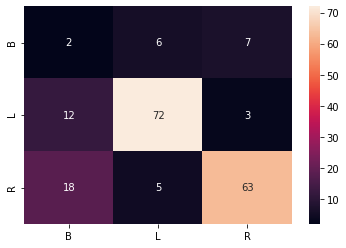

In [33]:
from sklearn.metrics import confusion_matrix
list_values = ["B", "L", "R"]
cm = confusion_matrix(y_test, clf_entropy.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", xticklabels = list_values, yticklabels = list_values )

17) How to avoid the over-fitting in the case of decision trees? Find a set of hyperparameters that will improve the test score and reduce the over-fitting.

18) We create new variables to improve the performance

In [34]:
from sklearn.model_selection import GridSearchCV

max_depth = np.arange(1, 11)
#min_samples_split = np.arange(1, 21)
min_samples_leaf = [1, 5, 10, 20, 50, 100]

hyperparameters = dict(max_depth = max_depth,
   #                    min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(tree.DecisionTreeClassifier(), hyperparameters, cv = 10, verbose=0)


In [35]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8, 

In [36]:
grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 1}

In [37]:
grid.best_estimator_.score(X_test, y_test)*100

77.12765957446808

In [38]:
print(classification_report(y_true = y_test, y_pred = grid.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           B       0.20      0.07      0.10        15
           L       0.80      0.83      0.81        87
           R       0.77      0.84      0.80        86

    accuracy                           0.77       188
   macro avg       0.59      0.58      0.57       188
weighted avg       0.74      0.77      0.75       188



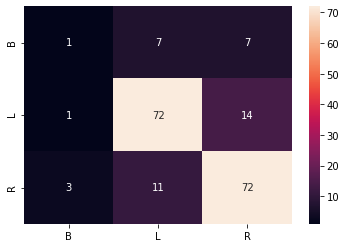

In [39]:
sns.heatmap(confusion_matrix(y_test, grid.best_estimator_.predict(X_test)),
            annot=True,
            fmt="d",
            xticklabels = list_values,
            yticklabels = list_values)

In [40]:
y_test.value_counts()

L    87
R    86
B    15
Name: balance, dtype: int64

In [41]:
pd.value_counts(pd.Series(grid.best_estimator_.predict(X_test)))

R    93
L    90
B     5
dtype: int64

We don't seem to have improved the model a lot. What are the strategies for improvement?  
There are different ones, but first let us simplify the problem. We want to deal with a binary classification problem, i.e. to predict 0 or 1. In order to do so, we unify the classes L and R under the class 0 and the B under the class 1.

In [42]:
data_binary = data.copy()
data_binary['balance'] = [1 if b == 'B' else 0 for b in data.balance]

In [43]:
data_binary['balance'].value_counts()

0    576
1     49
Name: balance, dtype: int64

In [44]:
print("Percentage of the 1 class compared to the entire dataset: "+str(data['balance'].value_counts()[1] * 100 / data['balance'].count())+"%")

Percentage of the 1 class compared to the entire dataset: 46.08%


Now we train a model to see how it will perform.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y = data_binary.balance
X = data_binary.drop('balance', axis=1)

lr = LogisticRegression().fit(X, y)
y_pred_lr = lr.predict(X)

In [46]:
print(accuracy_score(y_pred_lr, y)*100)
print(lr.score(X, y)*100)

92.16
92.16


So our model has 92% overall accuracy, but is it because it's predicting only 1 class. In the y_pred_lr we don't have any value for the tha class 1, we predicted all the values as the 0 class, and we still reached an accuracy of the 92.16%.

In [47]:
print(np.unique(y_pred_lr))
pd.value_counts(pd.Series(y_pred_lr))

[0]


0    625
dtype: int64

Let us look at the first technique for [handling imbalanced classes](https://elitedatascience.com/imbalanced-classes): up-sampling the minority class.

## Up-sample minority Class

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

There are several heuristics for doing so, but the most common way is to simply resample with replacement.

First, we'll import the resampling module from Scikit-Learn.

Next, we'll create a new DataFrame with an up-sampled minority class. Here are the steps:

1. separate observations from each class into different DataFrames.  
2. resample the minority class with replacement, setting the number of samples to match that of the majority class.  
3. combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [48]:
# Separate majority and minority classes
df_majority = data_binary[data_binary.balance==0]
df_minority = data_binary[data_binary.balance==1]

In [49]:
# Upsample minority class
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=576,    # to match majority class
                                 random_state=123) # reproducible results

In [50]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [51]:
# Display new class counts
df_upsampled.balance.value_counts()

1    576
0    576
Name: balance, dtype: int64

As you can see, the new DataFrame has more observations than the original, and the ratio of the two classes is now 1:1.

Let's train another model using Logistic Regression, this time on the balanced dataset:

In [52]:
# Separate input features (X) and target variable (y)
y = df_upsampled.balance
X = df_upsampled.drop('balance', axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state = 42)

In [54]:
# Train model
lr_upsampled = LogisticRegression().fit(X_train, y_train)
lr_upsampled.score(X_test, y_test)*100

50.86705202312138

In [55]:
dtc_upsampled = tree.DecisionTreeClassifier().fit(X_train, y_train)
dtc_upsampled.score(X_test, y_test)*100

94.50867052023122

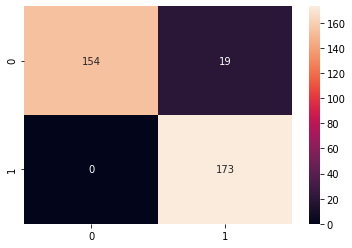

In [56]:
sns.heatmap(confusion_matrix(y_test, dtc_upsampled.predict(X_test)),
            annot=True,
            fmt="d")

We managed to improve our decision tree model using the up-sampling technique.

Now the model is no longer predicting just one class.

## Down-sample majority Class

Down-sampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

The most common heuristic for doing so is resampling without replacement.

The process is similar to that of up-sampling. Here are the steps:

1. separate observations from each class into different DataFrames.
2. resample the majority class without replacement, setting the number of samples to match that of the minority class.
3. combine the down-sampled majority class DataFrame with the original minority class DataFrame.

In [57]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=49,     # to match minority class
                                 random_state=123) # reproducible results

In [58]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [59]:
# Display new class counts
df_downsampled.balance.value_counts()

1    49
0    49
Name: balance, dtype: int64

This time, the new DataFrame has fewer observations than the original, and the ratio of the two classes is now 1:1.  
Again, let's train a model using Logistic Regression.

In [60]:
# Separate input features (X) and target variable (y)
y = df_downsampled.balance
X = df_downsampled.drop('balance', axis=1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state = 42)

In [62]:
# Train model
lr_downsampled = LogisticRegression().fit(X_train, y_train)
lr_downsampled.score(X_test, y_test)*100

43.333333333333336

In [63]:
dtc_downsampled = tree.DecisionTreeClassifier().fit(X_train, y_train)
dtc_downsampled.score(X_test, y_test)*100

60.0

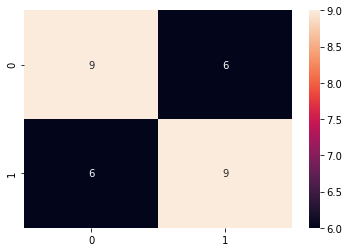

In [64]:
sns.heatmap(confusion_matrix(y_test, dtc_downsampled.predict(X_test)),
            annot=True,
            fmt="d")

The down-sampling technique gets better results than the linear regression, but still does not reach the same performance as in the up-sampling technique.

Let us now try to apply the up-sampling to the 3 class problem, upsampling the minority class to the majority clas(es). 
The majority classes R and L have 288 values, so we upsample the B class to 288.

In [65]:
df_minority_B = data[data.balance=="B"]
df_majority_R_L = data[data.balance!="B"]
n_samples_L = data[data.balance=="L"].shape[0]

df_minority_upsampled = resample(df_minority_B, 
                                 replace=True,     # sample with replacement
                                 n_samples=n_samples_L,    # to match majority classes R or L
                                 random_state=123) # reproducible results

In [66]:
# Combine minority class with downsampled majority class
df_upsampled_R_L_B = pd.concat([df_majority_R_L, df_minority_upsampled])

In [67]:
# Display new class counts
df_upsampled_R_L_B.balance.value_counts()

B    288
R    288
L    288
Name: balance, dtype: int64

In [68]:
# Separate input features (X) and target variable (y)
y = df_upsampled_R_L_B.balance
X = df_upsampled_R_L_B.drop('balance', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state = 42)

dtc_upsampled_complete = tree.DecisionTreeClassifier().fit(X_train, y_train)
dtc_upsampled_complete.score(X_test, y_test)*100
y_pred_complete = dtc_upsampled_complete.predict(X_test)

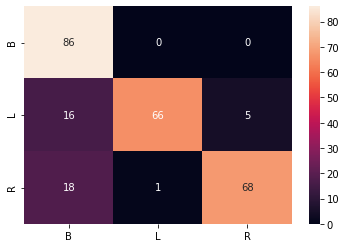

In [69]:
cm = confusion_matrix(y_test, y_pred_complete)
sns.heatmap(cm, annot=True, fmt="d", xticklabels = list_values, yticklabels = list_values )

In [70]:
y_test.value_counts()

L    87
R    87
B    86
Name: balance, dtype: int64

In [71]:
print(classification_report(y_true = y_test, y_pred = y_pred_complete))

              precision    recall  f1-score   support

           B       0.72      1.00      0.83        86
           L       0.99      0.76      0.86        87
           R       0.93      0.78      0.85        87

    accuracy                           0.85       260
   macro avg       0.88      0.85      0.85       260
weighted avg       0.88      0.85      0.85       260



In conclusion, we managed to improve the score of the decision tree model by upsampling the minority class.